Objectif de ce code : 
Identifier les variables intéressantes pour le groupement des pays en fonction
de leurs caractéristiques (clustering)
- Suppression des indicateurs mal renseignés (avec de nombreuses valeurs manquantes)
- Identification des variables à prendre en compte dans le clustering
(grâce à des matrices de corrélations pour éviter la redondance d'information avec la donnée d'émission)


In [1]:
# Library import

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Command so that plots appear in the iPython Notebook
%matplotlib inline

#    I - DATA IMPORT    


In [2]:
data = pd.read_csv('C:\\Users\\mcoug\\Dropbox\\Etude de cas iAdvize\\Data\\WDI\\WDIData.csv', sep=',')
country = pd.read_csv('C:\\Users\\mcoug\\Dropbox\\Etude de cas iAdvize\\Data\\WDI\\WDICountry.csv', sep=',')
series_1= pd.read_csv('C:\\Users\\mcoug\\Dropbox\\Etude de cas iAdvize\\Data\\WDI\\WDISeries.csv', sep=',')

#    II - MATRICE DE CORRELATIONS SUR L'ENSEMBLE DES INDICATEURS 

In [3]:
# 1 - Identification des indicateurs bien renseignés (avec pas trop de valeurs manquantes)

# On compte le nombre de fois où l'indicateur est renseigné (sur l'ensemble des pays)
# Ce comptage se fait sur chaque date

check_indic = data.groupby("Indicator Name").count()

# On nettoie les données en supprimant les champs inutiles

check_indic.drop(['Country Name','Country Code', 'Indicator Code', 'Unnamed: 62'],axis=1, inplace=True)

# On supprime 1960 et 2017 car il y a très peu de données renseignées pour ces 2 dates

check_indic.drop(['1960','2017'],axis=1, inplace=True)

# On calcule un "taux de renseignement" pour chaque indicateur

check_indic["taux ok"] = np.mean(check_indic,axis=1) / 264

# On ne garde que les indicateurs avec un taux >= 60%

kpi_ok = check_indic[check_indic["taux ok"]>=0.6]
kpi_ok=kpi_ok[["taux ok"]]

In [6]:
kpi_ok.head(10)

,taux ok
Indicator Name,
Adjusted savings: education expenditure (% of GNI),0.644075
Adjusted savings: mineral depletion (current US$),0.668966
"Adolescent fertility rate (births per 1,000 women ages 15-19)",0.892857
Age dependency ratio (% of working-age population),0.904627
"Age dependency ratio, old (% of working-age population)",0.904627
"Age dependency ratio, young (% of working-age population)",0.904627
Agricultural land (% of land area),0.871753
Agricultural land (sq. km),0.883252
Agricultural methane emissions (% of total),0.657129


On perd beaucoup d'indicateurs => essayons en ne prenant que sur les 20 dernières années (là où les données sont les mieux renseignées)

In [7]:
# On supprime les dates de 1961 à 1993

list_date_drop = ['1961','1962','1963','1964','1965','1966','1967','1968','1969','1970',
                  '1971','1972','1973','1974','1975','1976','1977','1978','1979',	'1980',	
                  '1981','1982','1983','1984','1985','1986','1987','1988','1989','1990',
                  '1991','1992','1993']

for i in list_date_drop:
    check_indic.drop([i],axis=1, inplace=True)
    
# On recalcule notre "taux de renseignement" pour chaque indicateur
    
check_indic.drop(["taux ok"],axis=1, inplace=True)
check_indic["taux ok"] = np.mean(check_indic,axis=1) / 264

# On ne garde que les variables avec un taux >= 60%

kpi_ok_bis = check_indic[check_indic["taux ok"]>=0.6]
kpi_ok_bis=kpi_ok_bis[["taux ok"]]

In [9]:
kpi_ok_bis.head(10)

,taux ok
Indicator Name,
Access to electricity (% of population),0.884387
"Access to electricity, rural (% of rural population)",0.867754
"Access to electricity, urban (% of urban population)",0.751976
Adjusted net national income (current US$),0.635211
Adjusted net national income per capita (current US$),0.751318
Adjusted savings: carbon dioxide damage (% of GNI),0.708498
Adjusted savings: carbon dioxide damage (current US$),0.671607
Adjusted savings: consumption of fixed capital (% of GNI),0.717556
Adjusted savings: consumption of fixed capital (current US$),0.693347


Remarque : on garde ici 582 indicateurs contre 1575 au départ

In [10]:
# 2 - Création de la matrice de corrélations sur l'ensemble des indicateurs retenus
# On va travailler ici sur les émissions par personne afin de s'affranchir de
# l'effet du nombre d'habitants sur les émissions de CO2

#On ne garde que les données concernant les indicateurs retenus

prepa_matrice_corr = pd.merge(data,kpi_ok_bis,left_on='Indicator Name', right_index=True)

# On ne garde ensuite que le pays, le nom du kpi et sa valeur pour 2014

prepa_matrice_corr=prepa_matrice_corr[['Country Name', 'Indicator Name', '2014']]

# On transpose cette table pour avoir une ligne par pays

prepa_matrice_corr_pivot = prepa_matrice_corr.pivot_table(index=['Country Name'], columns='Indicator Name')

# On construit la matrice de corrélations

correlations=prepa_matrice_corr_pivot.corr()

In [11]:
correlations.head(10)

2014  \
Indicator Name                                          Access to electricity (% of population)   
     Indicator Name                                                                               
2014 Access to electricity (% of population)                                           1.000000   
     Access to electricity, rural (% of rural popula...                                0.973805   
     Access to electricity, urban (% of urban popula...                                0.900567   
     Adjusted net national income (current US$)                                        0.041992   
     Adjusted net national income per capita (curren...                                0.413169   
     Adjusted savings: carbon dioxide damage (% of GNI)                                0.193564   
     Adjusted savings: carbon dioxide damage (curren...                                0.117547   
     Adjusted savings: consumption of fixed capital ...                                0.135991   
     Adjusted savings: consumption of fixed capital ...                                0.140266   
     Adjusted savings: education expenditure (% of GNI)                                0.112774   

                                                                                                              \
Indicator Name                                          Access to electricity, rural (% of rural population)   
     Indicator Name                                                                                            
2014 Access to electricity (% of population)                                                      0.973805     
     Access to electricity, rural (% of rural popula...                                           1.000000     
     Access to electricity, urban (% of urban popula...                                           0.832319     
     Adjusted net national income (current US$)                                                   0.024677     
     Adjusted net national income per capita (curren...                                           0.449306     
     Adjusted savings: carbon dioxide damage (% of GNI)                                           0.153176     
     Adjusted savings: carbon dioxide damage (curren...                                           0.129196     
     Adjusted savings: consumption of fixed capital ...                                           0.107301     
     Adjusted savings: consumption of fixed capital ...                                           0.155667     
     Adjusted savings: education expenditure (% of GNI)                                           0.122171     

                                                                                                              \
Indicator Name                                          Access to electricity, urban (% of urban population)   
     Indicator Name                                                                                            
2014 Access to electricity (% of population)                                                      0.900567     
     Access to electricity, rural (% of rural popula...                                           0.832319     
     Access to electricity, urban (% of urban popula...                                           1.000000     
     Adjusted net national income (current US$)                                                   0.063833     
     Adjusted net national income per capita (curren...                                           0.321609     
     Adjusted savings: carbon dioxide damage (% of GNI)                                           0.206086     
     Adjusted savings: carbon dioxide damage (curren...                                           0.105109     
     Adjusted savings: consumption of fixed capital ...                                           0.084720     
     Adjusted savings: consumption of fixed capital ...                                           0.116048     
  

#    III - MATRICE DE CORRELATIONS SUR UN NOMBRE RESTREINT D'INDICATEURS  

Afin de faciliter la lecture et ensuite l'interprétation des groupes de pays que l'on va créer, on se restreint aux données environnementales concernant les émissions et la production d'énergie

On ne garde donc que les indicateurs avec assez peu de corrélation avec la variable d'émissions de CO2 par personne afin d'éviter la redondance d'information dans le modèle

On ne garde alors que les indicateurs avec une corrélation comprise entre -45% et 45% environ

Afin d'éviter les redondances d'information au sein de toutes ces données, on refait une matrice de corrélation

A noter que la copie dans mon code d'un grand nombre d'indicateurs entre '' n'est pas fait à la main mais via une formule excel !

In [12]:
liste_kpi = ['Access to electricity (% of population)',
'CO2 emissions from gaseous fuel consumption (% of total)',
'CO2 emissions from electricity and heat production, total (% of total fuel combustion)',
'Access to electricity, urban (% of urban population)',
'CO2 intensity (kg per kg of oil equivalent energy use)',
'Electricity production from natural gas sources (% of total)',
'Electricity production from oil, gas and coal sources (% of total)',
'CO2 emissions (kg per 2010 US$ of GDP)',
'Energy use (kg of oil equivalent) per $1,000 GDP (constant 2011 PPP)',
'CO2 emissions from gaseous fuel consumption (kt)',
'Electricity production from renewable sources, excluding hydroelectric (kWh)',
'Electricity production from nuclear sources (% of total)',
'CO2 emissions from liquid fuel consumption (kt)',
'Energy intensity level of primary energy (MJ/$2011 PPP GDP)',
'CO2 emissions (kt)',
'CO2 emissions from solid fuel consumption (% of total)',
'CO2 emissions from solid fuel consumption (kt)',
'Electricity production from coal sources (% of total)',
'Electricity production from oil sources (% of total)',
'Electricity production from renewable sources, excluding hydroelectric (% of total)',
'CO2 emissions from manufacturing industries and construction (% of total fuel combustion)',
'Alternative and nuclear energy (% of total energy use)',
'CO2 emissions from residential buildings and commercial and public services (% of total fuel combustion)',
'GDP per unit of energy use (PPP $ per kg of oil equivalent)',
'GDP per unit of energy use (constant 2011 PPP $ per kg of oil equivalent)',
'CO2 emissions from other sectors, excluding residential buildings and commercial and public services (% of total fuel combustion)',
'Energy imports, net (% of energy use)',
'CO2 emissions from liquid fuel consumption (% of total)',
'CO2 emissions from transport (% of total fuel combustion)',
'Electric power transmission and distribution losses (% of output)',
'Renewable electricity output (% of total electricity output)',
'Electricity production from hydroelectric sources (% of total)',
'Combustible renewables and waste (% of total energy)']

matrice_corr_light = prepa_matrice_corr[prepa_matrice_corr['Indicator Name'] == 'CO2 emissions (metric tons per capita)']

for i in liste_kpi:
    ajout_kpi = prepa_matrice_corr[prepa_matrice_corr['Indicator Name'] == i]
    matrice_corr_light = pd.concat([matrice_corr_light,ajout_kpi])

matrice_corr_light = matrice_corr_light.pivot_table(index=['Country Name'], columns='Indicator Name')


In [17]:
matrice_corr_light.corr().head(10)

2014  \
Indicator Name                                          Alternative and nuclear energy (% of total energy use)   
     Indicator Name                                                                                              
2014 Alternative and nuclear energy (% of total ener...                                           1.000000       
     CO2 emissions (metric tons per capita)                                                      -0.101965       
     CO2 emissions from electricity and heat product...                                          -0.384781       
     CO2 emissions from gaseous fuel consumption (% ...                                          -0.141035       
     CO2 emissions from liquid fuel consumption (% o...                                           0.147455       
     CO2 emissions from other sectors, excluding res...                                           0.291530       
     CO2 emissions from residential buildings and co...                                           0.113851       
     CO2 emissions from solid fuel consumption (% of...                                           0.021616       
     CO2 emissions from transport (% of total fuel c...                                           0.273284       
     Combustible renewables and waste (% of total en...                                          -0.142995       

                                                                                                \
Indicator Name                                          CO2 emissions (metric tons per capita)   
     Indicator Name                                                                              
2014 Alternative and nuclear energy (% of total ener...                              -0.101965   
     CO2 emissions (metric tons per capita)                                           1.000000   
     CO2 emissions from electricity and heat product...                               0.425178   
     CO2 emissions from gaseous fuel consumption (% ...                               0.431990   
     CO2 emissions from liquid fuel consumption (% o...                              -0.272915   
     CO2 emissions from other sectors, excluding res...                              -0.180508   
     CO2 emissions from residential buildings and co...                              -0.149178   
     CO2 emissions from solid fuel consumption (% of...                               0.052566   
     CO2 emissions from transport (% of total fuel c...                              -0.301115   
     Combustible renewables and waste (% of total en...                              -0.479658   

                                                                                                                                                \
Indicator Name                                          CO2 emissions from electricity and heat production, total (% of total fuel combustion)   
     Indicator Name                                                                                                                              
2014 Alternative and nuclear energy (% of total ener...                                          -0.384781                                       
     CO2 emissions (metric tons per capita)                                                       0.425178                                       
     CO2 emissions from electricity and heat product...                                           1.000000                                       
     CO2 emissions from gaseous fuel consumption (% ...                                           0.249656                                       
     CO2 emissions from liquid fuel consumption (% o...                                          -0.534759                                       
     CO2 emissions from other sectors, excluding res...                                          -0.353920                                       
     CO2 emissions from residentia

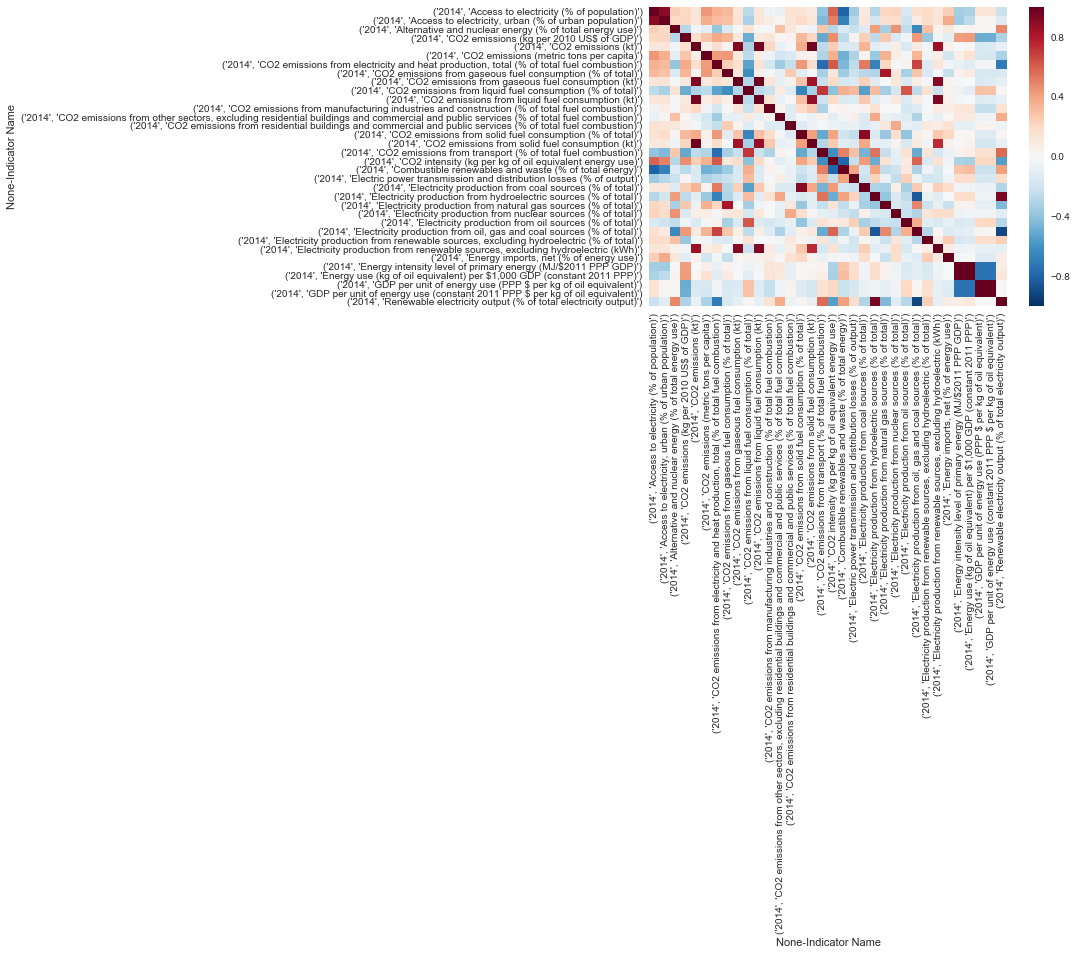

In [14]:
import seaborn as sns
corr = matrice_corr_light.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Lorsque 2 variables sont très corrélées, on supprime une des 2 pour éviter la redondance.
Après cet exercice, on obtient les indicateurs suivants (avec lesquels on refait le même exercice)


#    IV - MATRICE DE CORRELATIONS SUR LES INDICATEURS RETENUS

In [15]:
liste_kpi = ['CO2 emissions from gaseous fuel consumption (% of total)',
'CO2 emissions from electricity and heat production, total (% of total fuel combustion)',
'CO2 emissions from solid fuel consumption (% of total)',
'CO2 emissions from transport (% of total fuel combustion)',
'Alternative and nuclear energy (% of total energy use)',
'CO2 emissions from residential buildings and commercial and public services (% of total fuel combustion)',
'CO2 emissions from other sectors, excluding residential buildings and commercial and public services (% of total fuel combustion)',
'CO2 emissions from liquid fuel consumption (% of total)',
'Combustible renewables and waste (% of total energy)',
'GDP per unit of energy use (PPP $ per kg of oil equivalent)',
'Energy imports, net (% of energy use)',
'Electric power transmission and distribution losses (% of output)']

matrice_corr_light = prepa_matrice_corr[prepa_matrice_corr['Indicator Name'] == 'CO2 emissions (metric tons per capita)']

for i in liste_kpi:
    ajout_kpi = prepa_matrice_corr[prepa_matrice_corr['Indicator Name'] == i]
    matrice_corr_light = pd.concat([matrice_corr_light,ajout_kpi])

matrice_corr_light = matrice_corr_light.pivot_table(index=['Country Name'], columns='Indicator Name')


In [18]:
matrice_corr_light.corr().head(10)

2014  \
Indicator Name                                          Alternative and nuclear energy (% of total energy use)   
     Indicator Name                                                                                              
2014 Alternative and nuclear energy (% of total ener...                                           1.000000       
     CO2 emissions (metric tons per capita)                                                      -0.101965       
     CO2 emissions from electricity and heat product...                                          -0.384781       
     CO2 emissions from gaseous fuel consumption (% ...                                          -0.141035       
     CO2 emissions from liquid fuel consumption (% o...                                           0.147455       
     CO2 emissions from other sectors, excluding res...                                           0.291530       
     CO2 emissions from residential buildings and co...                                           0.113851       
     CO2 emissions from solid fuel consumption (% of...                                           0.021616       
     CO2 emissions from transport (% of total fuel c...                                           0.273284       
     Combustible renewables and waste (% of total en...                                          -0.142995       

                                                                                                \
Indicator Name                                          CO2 emissions (metric tons per capita)   
     Indicator Name                                                                              
2014 Alternative and nuclear energy (% of total ener...                              -0.101965   
     CO2 emissions (metric tons per capita)                                           1.000000   
     CO2 emissions from electricity and heat product...                               0.425178   
     CO2 emissions from gaseous fuel consumption (% ...                               0.431990   
     CO2 emissions from liquid fuel consumption (% o...                              -0.272915   
     CO2 emissions from other sectors, excluding res...                              -0.180508   
     CO2 emissions from residential buildings and co...                              -0.149178   
     CO2 emissions from solid fuel consumption (% of...                               0.052566   
     CO2 emissions from transport (% of total fuel c...                              -0.301115   
     Combustible renewables and waste (% of total en...                              -0.479658   

                                                                                                                                                \
Indicator Name                                          CO2 emissions from electricity and heat production, total (% of total fuel combustion)   
     Indicator Name                                                                                                                              
2014 Alternative and nuclear energy (% of total ener...                                          -0.384781                                       
     CO2 emissions (metric tons per capita)                                                       0.425178                                       
     CO2 emissions from electricity and heat product...                                           1.000000                                       
     CO2 emissions from gaseous fuel consumption (% ...                                           0.249656                                       
     CO2 emissions from liquid fuel consumption (% o...                                          -0.534759                                       
     CO2 emissions from other sectors, excluding res...                                          -0.353920                                       
     CO2 emissions from residentia

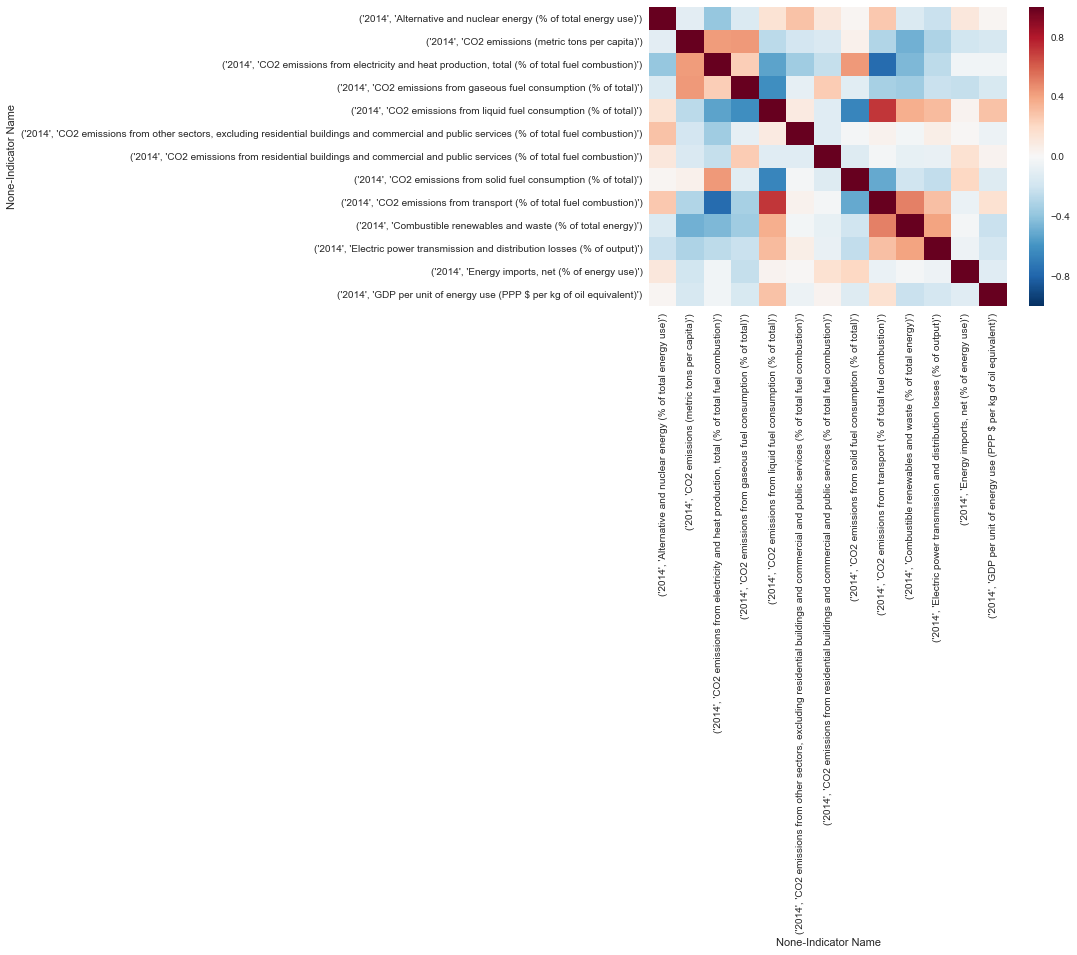

In [19]:
import seaborn as sns
corr = matrice_corr_light.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Nous avons donc obtenu les indicateurs que nous allons utiliser dans notre clustering